# Handling and analysis of all measured data + genetic data in the form of PCA components

#### Imports of all modules and external functions used

In [155]:
# import os for better file handling
import os


# standard library utilized in many calculations
import numpy as np


# standard library for handling data in a spreadsheet like manner
import pandas as pd


# standard library for plotting data 
import matplotlib.pyplot as plt
from matplotlib import transforms

# for overlaying images on top of plots
from matplotlib.offsetbox import OffsetImage
from matplotlib.offsetbox import AnnotationBbox

# another library used mainly for conviently plotting heat maps
import seaborn as sns


# functions for cluster analysis and dimension reduction
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing


# various functions for calculating relations between samples, standardization etc.
from scipy.cluster import hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix


# most used functions for calculating the amounts of variability in numeric and categorical variables
from scipy.stats import pearsonr
from scipy.stats import entropy 

#### Reading in all of the measurements

In [156]:
with open("alldata_cleaned.csv") as file:
    df = pd.read_csv(file, sep=";", decimal=",", na_values="-")

alldata=df.copy()

#Checking the first lines
alldata.head()

,SAMPLE,LUKE,principal component 1,principal component 2,TIME,LEAF MARGIN,ABAXIAL INDUMENTUM,PEONY HEIGHT,LEAF HEIGHT,UPRIGHTNESS,...,SHAPE,FRAGRANCE,CHL,CHL_SD,FLAV,FLAV_SD,ANTH,ANTH_SD,NBI,NBI_SD
0,25,LUKE-5050,-2.391752,-1.040240,2,RED,NO,790,560,1,...,DOUBLEZONES,NORMAL,35.891,2.710,1.683,0.235,0.127,0.032,21.798,4.162
1,26,LUKE-5051,0.142760,1.650453,1,RED,NO,870,640,2,...,DOUBLE,PLASTICKY,41.779,5.107,1.679,0.135,0.104,0.027,24.885,2.463
2,27,LUKE-5052,-1.264539,-0.891731,1,RED,NO,790,590,1,...,CROWN,SWEET,32.530,5.232,1.606,0.142,0.146,0.023,20.323,3.181
3,30,LUKE-4901,1.592366,1.168089,1,RED,NO,860,630,2,...,DOUBLE,PLASTICKY,27.665,3.136,1.542,0.250,0.176,0.021,18.228,2.640
4,32,LUKE-3425,-0.235052,-1.114539,1,BROWN,NO,920,610,1,...,CROWN,NORMAL,35.704,2.506,1.574,0.149,0.145,0.045,23.216,2.116


#### Removing the genetic data values from the data set into a separate list 

In [157]:
# The examined features are the columns of the measurement data
features = list(alldata.columns)

# Removing the LUKE codes from the dataset, while storing the codes to variable named lukecodes
lukecodes = alldata["LUKE"]
unnecessary_columns = ["LUKE"]
for i in unnecessary_columns:
    features.remove(i)

components = pd.DataFrame(data=alldata, columns=["principal component 1", "principal component 2", "SAMPLE"])

components = components.set_index("SAMPLE")
#principal components ordered by the sample names


# Removing the genetic data, which has been converted to principal component values, from the dataset, while storing the components in a separate list called principal_components
principal_components = ['principal component 1',
 'principal component 2']

for i in principal_components:
    features.remove(i)

# Single variable for referencing the measured features without the genetic data
measured_data = alldata[features]
measured_data.head()

,SAMPLE,TIME,LEAF MARGIN,ABAXIAL INDUMENTUM,PEONY HEIGHT,LEAF HEIGHT,UPRIGHTNESS,PEDUNCLE LENGTH,FLOWER DIAMETER,FLOWER HEIGHT,...,SHAPE,FRAGRANCE,CHL,CHL_SD,FLAV,FLAV_SD,ANTH,ANTH_SD,NBI,NBI_SD
0,25,2,RED,NO,790,560,1,10.3,144,52,...,DOUBLEZONES,NORMAL,35.891,2.710,1.683,0.235,0.127,0.032,21.798,4.162
1,26,1,RED,NO,870,640,2,12.0,139,63,...,DOUBLE,PLASTICKY,41.779,5.107,1.679,0.135,0.104,0.027,24.885,2.463
2,27,1,RED,NO,790,590,1,8.0,127,50,...,CROWN,SWEET,32.530,5.232,1.606,0.142,0.146,0.023,20.323,3.181
3,30,1,RED,NO,860,630,2,10.7,126,39,...,DOUBLE,PLASTICKY,27.665,3.136,1.542,0.250,0.176,0.021,18.228,2.640
4,32,1,BROWN,NO,920,610,1,9.3,158,72,...,CROWN,NORMAL,35.704,2.506,1.574,0.149,0.145,0.045,23.216,2.116


## Calculating the genetic distances between the samples into a new dataframe 

In [158]:
# genetic distances as a 2 dimensinoal matrix representation
pairwise = pd.DataFrame(
    squareform(pdist(components)),
    columns = components.index,
    index = components.index
)
pairwise = pairwise.rename_axis(None)

#scaling of distance values 0 to 1
distance_values = pairwise.values
min_max_scaler = preprocessing.MinMaxScaler()
distance_values_skaalattu = min_max_scaler.fit_transform(distance_values)

#Distance values into a new dataframe for plotting 
pairwise_scaled = pd.DataFrame(distance_values_skaalattu, columns = components.index,
    index = components.index)

# Replace the values with 1-value, so that a higher value depicts closer distance 
pairwise_scaled_flipped = pair_stand.applymap(lambda x: 1-x)

### Plotting the genetic distances in a heat map

<Figure size 2000x2000 with 0 Axes>

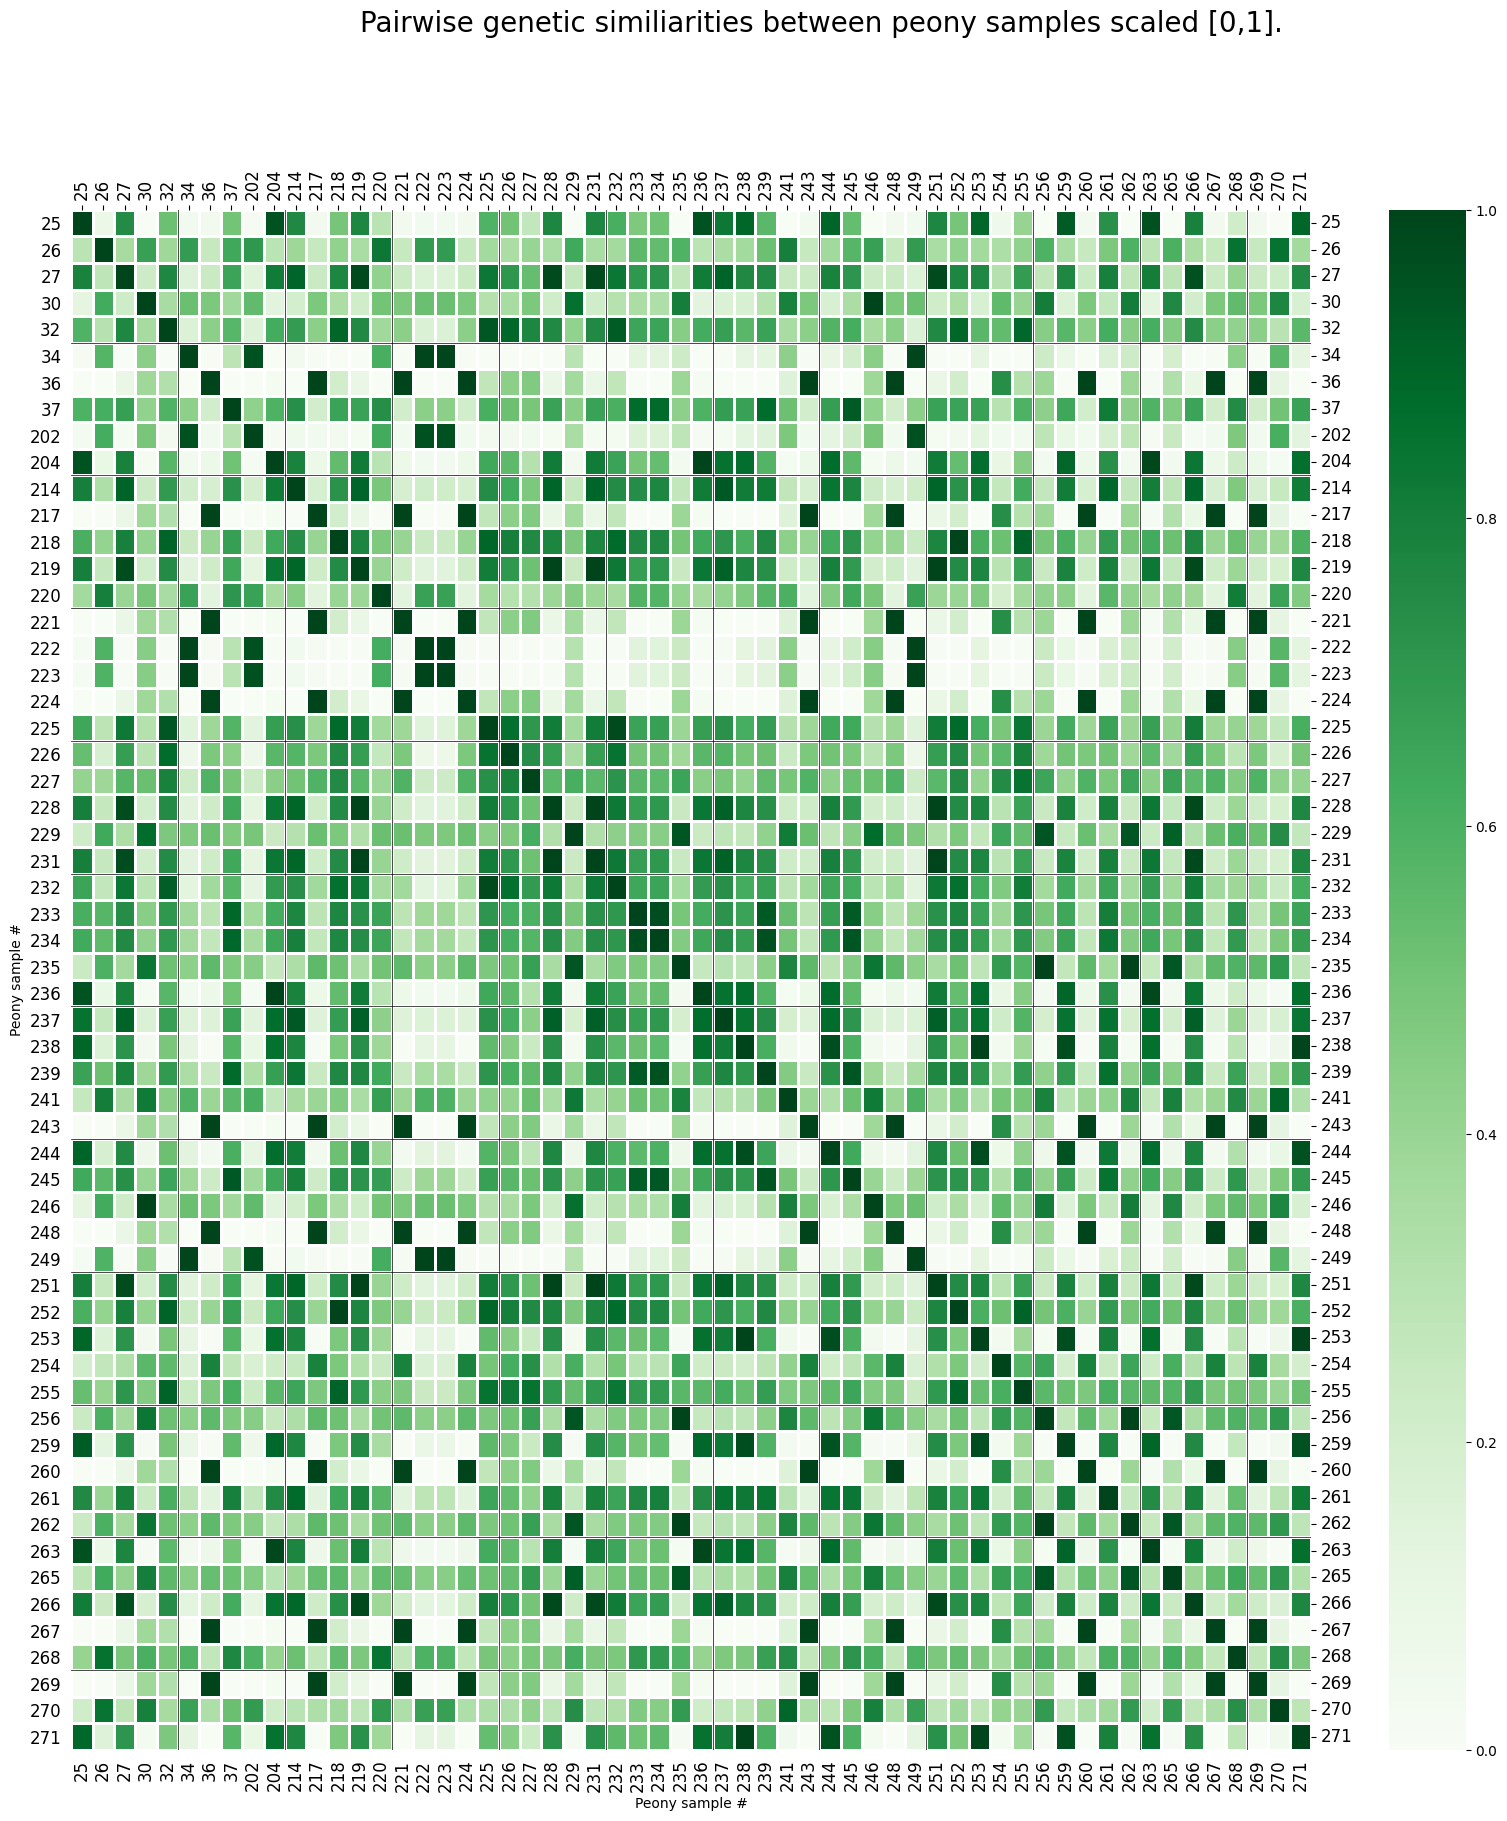

In [193]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(20,20))
ax.yaxis.tick_right()

#Plotting using the seaborn heatmap function, closer connections depicted with stronger shades of green
sns.heatmap(
    pairwise_scaled_flipped,
    annot=False,
    cmap='Greens',
    linewidth=2,
    square=False
)

#Tweaking the plot
ax.xaxis.tick_top()
ax.tick_params(labeltop=True, labelright=True, labelbottom = True, labelleft = True)
plt.yticks(rotation=0, fontsize = 12)
plt.xticks(rotation=90, fontsize = 12)
plt.xlabel("Peony sample #")
plt.ylabel("Peony sample #")
plt.suptitle("Pairwise genetic similiarities between peony samples scaled [0,1].", fontsize = 20)

# Add lines between every 5 rows and columns for readability
for i in range(5, pairwise_scaled_flipped.shape[0], 5):
    plt.axhline(y=i, color='black', linewidth=0.5)
    plt.axvline(x=i, color='black', linewidth=0.5)

plt.show()
#use plt.savefig to save a plot
#plt.savefig("genetic_pairwise.png", dpi = 300)


## Dendrogrammeja omasta datasta

In [160]:
measured_data_analyysi = measured_data.copy()


measured_data_analyysi = measured_data_analyysi.drop("SAMPLE", axis=1)
#measured_data_analyysi = measured_data_analyysi.drop("naytenumero", axis=1)


numerics = measured_data_analyysi.select_dtypes(exclude=['object'])

numerics_z = stats.zscore(numerics, axis=0, ddof=0,nan_policy="omit")
numerics_z

kaikki_z = stats.zscore(measured_data_analyysi.select_dtypes(exclude=['object']), axis=0, ddof=0,nan_policy="omit") 

kaikki_z = kaikki_z.join(measured_data_analyysi.select_dtypes(include=['object']))

#kaikki_z

#KORVAA TYHJÄT NOLLILLA - EI OPTIMAALINEN
kaikki_z = kaikki_z.fillna(method="ffill")
kaikki_z.isna().sum()
len(components)


58

In [161]:
korrelaatiot = kaikki_z.copy()
korrelaatiot = korrelaatiot.select_dtypes(include=['object']).astype("category").join(korrelaatiot.select_dtypes(exclude=['object']))
dummyt = pd.get_dummies(korrelaatiot.select_dtypes(include=['category']), dtype=int)
dummattu_data = korrelaatiot.select_dtypes(exclude=['category']).join(dummyt)
dummattu_z = stats.zscore(dummattu_data, axis=0, ddof=0,nan_policy="omit")
dummattu_z_corrw = dummattu_data.apply(lambda x: dummattu_z.corrwith(x))


In [162]:
"""# Korrelaatiotestailua
korrelaatiot = measured_data.copy()
korrelaatiot = korrelaatiot.drop("SAMPLE", axis=1)
korrelaatiot = korrelaatiot.select_dtypes(include=['object']).astype("category").join(korrelaatiot.select_dtypes(exclude=['object']))

dummyt = pd.get_dummies(korrelaatiot.select_dtypes(include=['category']), dtype=int)
dummattu_data = korrelaatiot.select_dtypes(exclude=['category']).join(dummyt)
dummattu_data.head()


principal_components = ["principal component 1","principal component 2"]

dummattu_z = stats.zscore(dummattu_data, axis=0, ddof=0,nan_policy="omit")
dummattu_z_corrw = dummattu_data.apply(lambda x: components.corrwith(x))


for col in kaikki_z_cat.columns:
    value_counts_result[col] = kaikki_z_cat[col].value_counts()


value_df = value_counts_result.to_frame()

len(kaikki_z_cat.columns)
"""

kaikki_z_num = kaikki_z.select_dtypes(include = ['float'])
kaikki_z_cat = kaikki_z.select_dtypes(include = ['object'])

kaikki_z_cat_counts = kaikki_z_cat.apply(pd.Series.value_counts)

lukumaaralista = []

for category in kaikki_z_num.columns:
    lukumaaralista.extend({str(category)})


for category in kaikki_z_cat_counts.columns:
    for value, count in kaikki_z_cat_counts[category].items():
        try:
            lukumaaralista.append(f"{category} - {value} ({int(count)})")
        except:
            #Skip rows with nan values for counts
            pass



<Figure size 2000x2000 with 0 Axes>

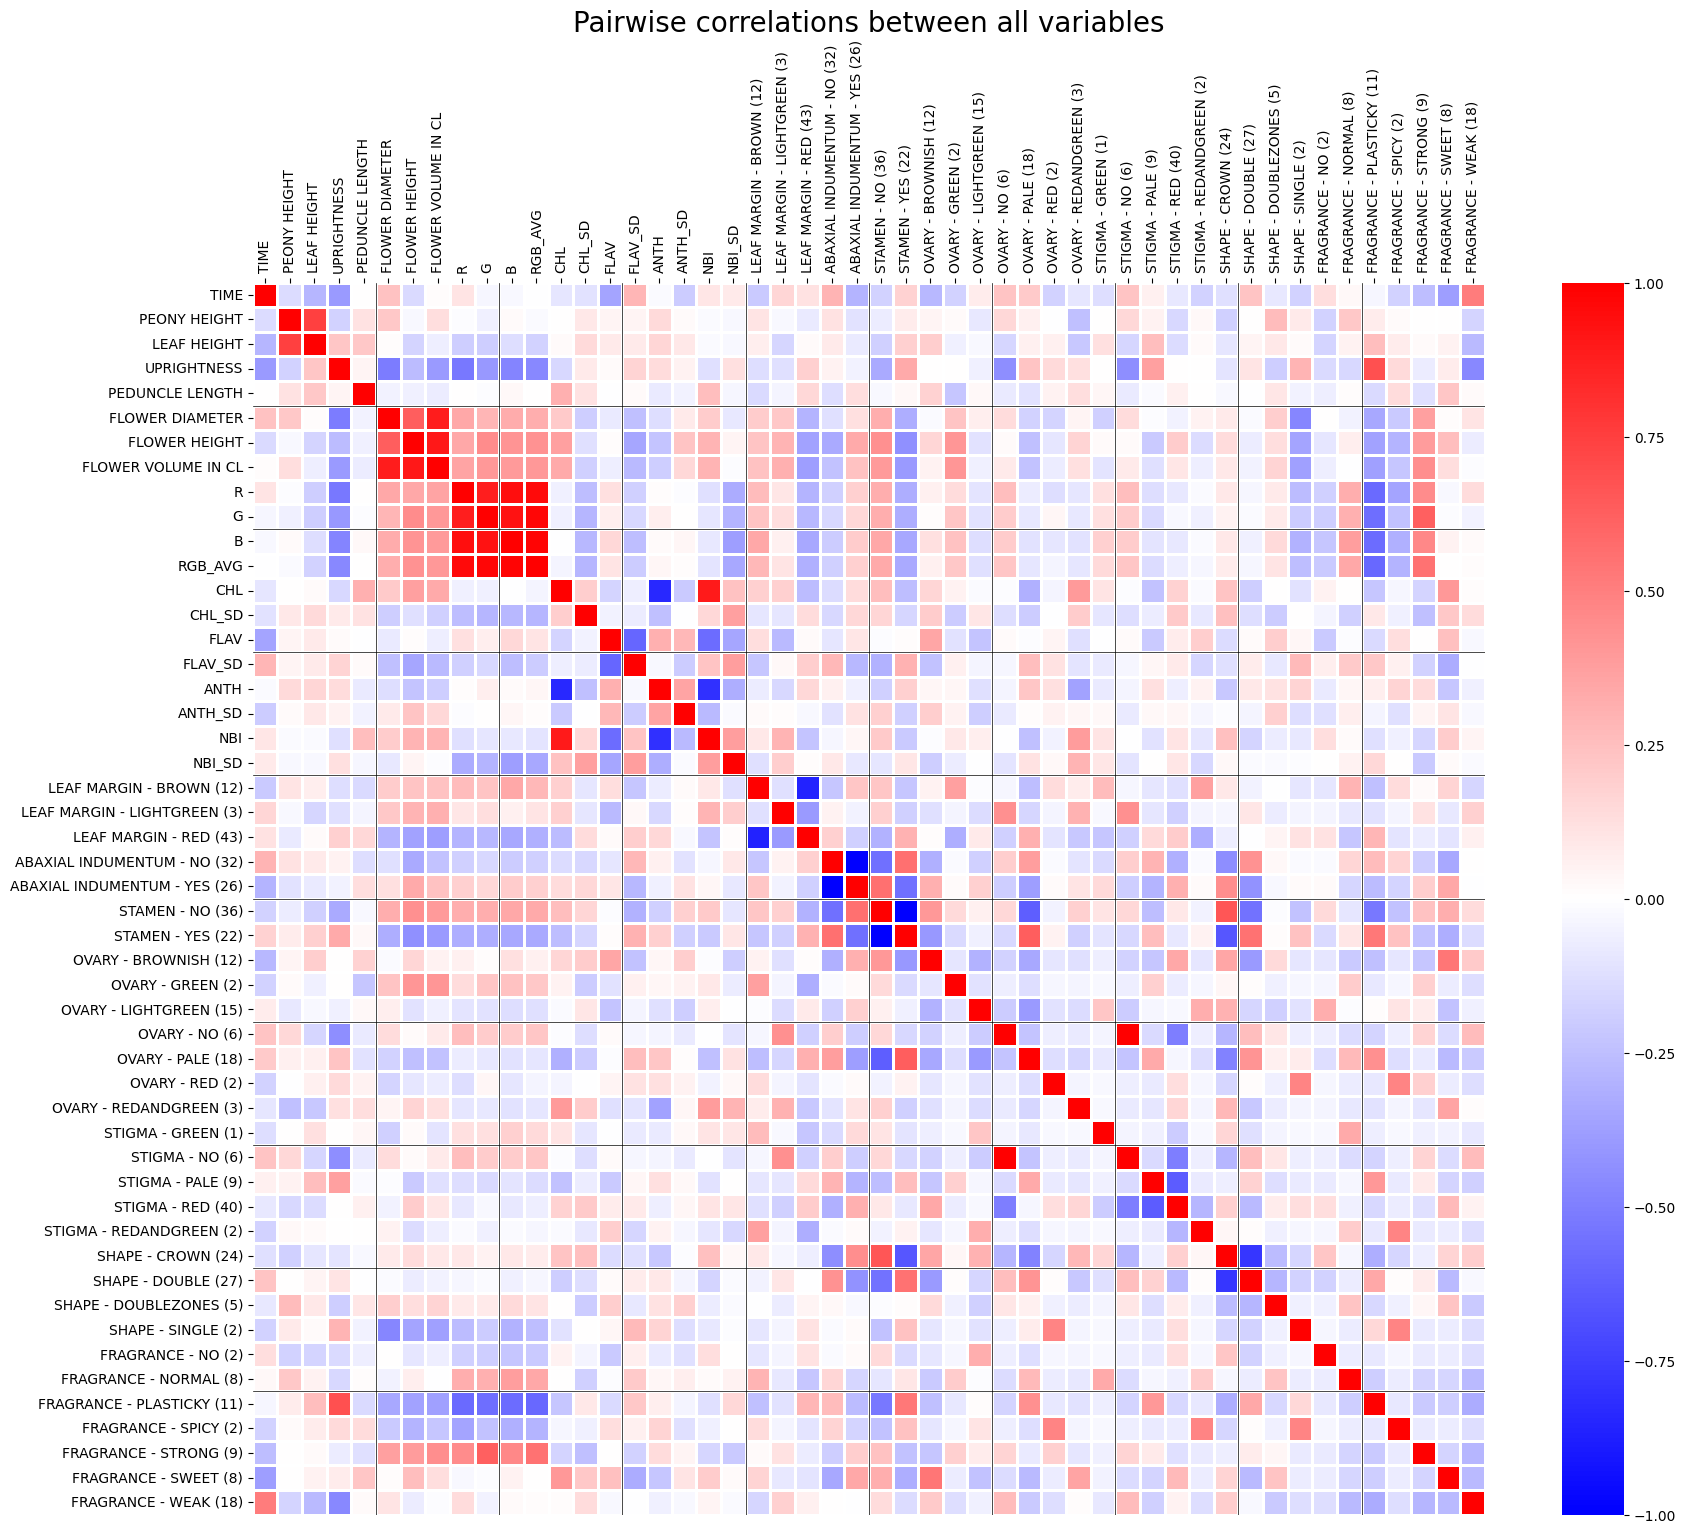

In [163]:
# Muuttujien välisiä korrelaatioita
#numerics_z_pca = numerics_z.copy()
#numerics_z_pca = numerics_z_pca.join(data["principal component 1"])
#numerics_z_pca = numerics_z_pca.join(data["principal component 2"])

#dummattu_z_pca = dummattu_z.copy()
#dummattu_z_pca = dummattu_z_pca.join(data["principal component 1"])
#dummattu_z_pca = dummattu_z_pca.join(data["principal component 2"])


plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(20,16))
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

correlationmatrix = dummattu_z.corr(method='pearson')

dummattu_z_corrw_transp = dummattu_z_corrw.transpose()


sns.heatmap(
    correlationmatrix,
    xticklabels=lukumaaralista,
    yticklabels=lukumaaralista,
    square=True,
    cmap='bwr',
    cbar= True,
    linewidth=1)

#plt.savefig("correlations_dummattudata_kaikki.png", dpi=300)

# Get the column names from kaikki_z_cat
#kaikki_z_cat_columns = kaikki_z_cat.columns

#ax.set_yticklabels(lukumaaralista)

# Get the existing y-axis tick labels
#existing_labels = [label.get_text() for label in ax.get_yticklabels()]

# Add lines between every 5 rows and columns
for i in range(5, correlationmatrix.shape[0], 5):
    plt.axhline(y=i, color='black', linewidth=0.5)
    plt.axvline(x=i, color='black', linewidth=0.5)

plt.title("Pairwise correlations between all variables", fontsize = 20)

plt.show()

In [164]:


components = components.reset_index(drop=True)


# Assuming kaikki_z_num is your dataframe with standardized features
# and components is your dataframe with coordinates

# Convert feature values to numeric
#kaikki_z_num = kaikki_z_num.apply(pd.to_numeric, errors='coerce')

kaikki_z_num = kaikki_z.select_dtypes(include = ['float'])
kaikki_z_cat = kaikki_z.select_dtypes(include = ['object'])

# Replace NaN values with the mean of the non-NaN values in the same column
#kaikki_z_num = kaikki_z_num.apply(lambda x: x.fillna(x.mean()),axis=0)


# Calculate the distance matrix
dist_matrix = pd.DataFrame(distance_matrix(components.to_numpy(), components.to_numpy()), index=components.index, columns=components.index)

# Initialize an empty dataframe to store correlation results
correlation_results = pd.DataFrame(index=kaikki_z_num.columns, columns=['Correlation', 'P-value'])

# Loop over each feature in the dataframe
for feature in kaikki_z_num.columns:
    # Create a list to store the feature values and corresponding distances
    feature_values = []
    distances = []
    
    # Loop over each pair of samples
    for i in range(len(kaikki_z_num)):
        for j in range(i+1, len(kaikki_z_num)):
            # Append the absolute difference in feature values and the distance between samples
            feature_difference = kaikki_z_num.iloc[i][feature] - kaikki_z_num.iloc[j][feature]
            if np.isnan(feature_difference):
                continue
            feature_values.append(abs(feature_difference))
            distances.append(dist_matrix.iloc[i][j])
    
    # Skip the feature if all feature differences were NaN
    if not feature_values:
        continue
    
    # Calculate the correlation between feature differences and distances
    correlation, p_value = pearsonr(feature_values, distances)
    
    # Store the correlation and p-value in the results dataframe
    correlation_results.loc[feature] = [correlation, p_value]

# Print the results
print(correlation_results)

                    Correlation   P-value
TIME                  -0.010709  0.663494
PEONY HEIGHT           0.009103   0.71152
LEAF HEIGHT            0.095541    0.0001
UPRIGHTNESS            0.188538       0.0
PEDUNCLE LENGTH       -0.007537  0.759462
FLOWER DIAMETER       -0.008184  0.739511
FLOWER HEIGHT          0.170948       0.0
FLOWER VOLUME IN CL    0.080133  0.001111
R                      0.340852       0.0
G                      0.408419       0.0
B                      0.315107       0.0
RGB_AVG                0.386613       0.0
CHL                    0.169535       0.0
CHL_SD                 0.164064       0.0
FLAV                   0.021503  0.382279
FLAV_SD                0.064702  0.008505
ANTH                   0.125091       0.0
ANTH_SD                0.027348  0.266462
NBI                    0.045022  0.067246
NBI_SD                 0.041993  0.087867


The frequencies of LEAF MARGIN in cluster 0 are:
LEAF MARGIN
RED           0.633333
BROWN         0.266667
LIGHTGREEN    0.100000
Name: proportion, dtype: float64
The frequencies of ABAXIAL INDUMENTUM in cluster 0 are:
ABAXIAL INDUMENTUM
NO     0.6
YES    0.4
Name: proportion, dtype: float64
The frequencies of STAMEN in cluster 0 are:
STAMEN
NO     0.633333
YES    0.366667
Name: proportion, dtype: float64
The frequencies of OVARY in cluster 0 are:
OVARY
PALE           0.333333
LIGHTGREEN     0.266667
NO             0.166667
BROWNISH       0.100000
GREEN          0.066667
REDANDGREEN    0.033333
RED            0.033333
Name: proportion, dtype: float64
The frequencies of STIGMA in cluster 0 are:
STIGMA
RED            0.633333
NO             0.166667
PALE           0.100000
REDANDGREEN    0.066667
GREEN          0.033333
Name: proportion, dtype: float64
The frequencies of SHAPE in cluster 0 are:
SHAPE
DOUBLE         0.500000
CROWN          0.366667
DOUBLEZONES    0.100000
SINGLE         0

c:\Users\antti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


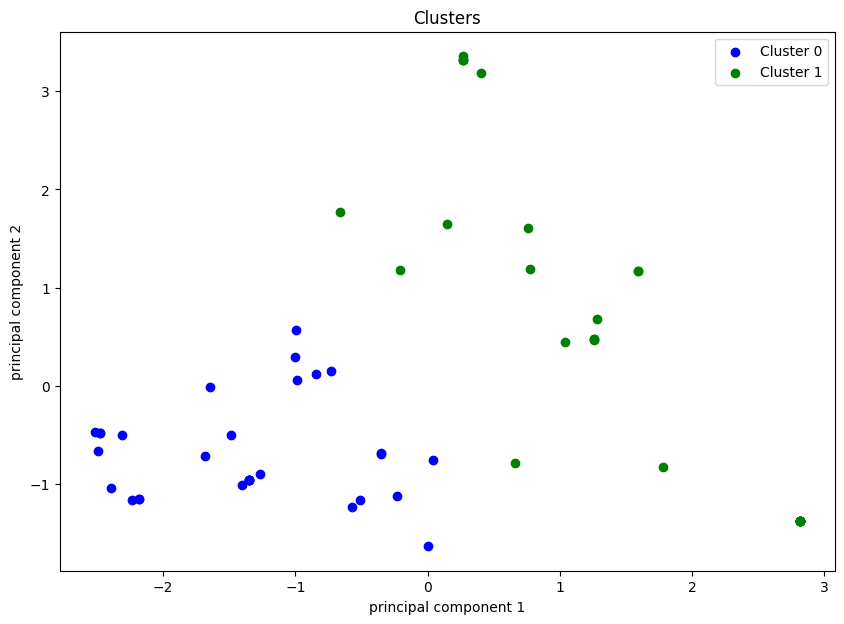

In [165]:

# Assume we have the following two dataframes


# Concatenate the two dataframes along the column axis
df = pd.concat([components, kaikki_z_cat], axis=1)

# Use K-means to identify groups of samples that are close to each other
kmeans = KMeans(n_clusters=2, random_state=0).fit(df[['principal component 1', 'principal component 2']])
df['cluster'] = kmeans.labels_

# For each cluster
for cluster in df['cluster'].unique():
    # Select the samples in this cluster
    df_cluster = df[df['cluster'] == cluster]
    
    # For each feature column
    for feature in kaikki_z_cat.columns:
        # Calculate the frequency of each feature value within this cluster
        feature_counts = df_cluster[feature].value_counts(normalize=True)
        
        print(f"The frequencies of {feature} in cluster {cluster} are:")
        print(feature_counts)

# For each cluster
for cluster in df['cluster'].unique():
    # Select the samples in this cluster
    df_cluster = df[df['cluster'] == cluster]
    
    # For each feature column
    for feature in kaikki_z_cat.columns:
        # Calculate the frequency of each feature value within this cluster
        feature_counts = df_cluster[feature].value_counts(normalize=True)
        
        print(f"The frequencies of {feature} in cluster {cluster} are:")
        print(feature_counts)

# New code for plotting
plt.figure(figsize=(10, 7))

# Create a color map
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot each cluster
for cluster in df['cluster'].unique():
    # Select the samples in this cluster
    df_cluster = df[df['cluster'] == cluster]
    plt.scatter(df_cluster['principal component 1'], df_cluster['principal component 2'], color=colors[cluster], label=f'Cluster {cluster}')

plt.title('Clusters')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend()
plt.show()


In [166]:
# association measure based on metric distances and value validity




# Merge the two dataframes on sample_id
df = pd.concat([components, kaikki_z_cat], axis=1)


# Calculate Euclidean distances between all pairs of samples
distances = cdist(df[['principal component 1', 'principal component 2']], df[['principal component 1', 'principal component 2']], metric='euclidean')

# For each feature column
for feature in kaikki_z_cat.columns:
    # For each unique feature value, calculate the mean distance between samples with that feature value
    mean_distances = {value: distances[df[feature] == value].mean() for value in df[feature].unique()}
    
    # The association measure is the mean of these mean distances
    association_measure = np.mean(list(mean_distances.values()))
    
    print(f"The association measure for {feature} is {association_measure}")

The association measure for LEAF MARGIN is 2.563077392352713
The association measure for ABAXIAL INDUMENTUM is 2.661272596186578
The association measure for STAMEN is 2.666309537404948
The association measure for OVARY is 2.647208579654836
The association measure for STIGMA is 2.503544771753754
The association measure for SHAPE is 2.6616366557424307
The association measure for FRAGRANCE is 2.599366374572902


In [167]:
pca = PCA(n_components=2)
numerics_oma_pComponents = pca.fit_transform(numerics_z)
principalDfoma_numerics = pd.DataFrame(data = numerics_oma_pComponents, columns = ['oma PC1', 'oma PC2'])

omaFinal_numerics = pd.concat([principalDfoma_numerics, measured_data['SAMPLE']], axis = 1)
omaFinal_numerics

,oma PC1,oma PC2,SAMPLE
0,-0.250254,-1.124611,25
1,2.152171,0.398088,26
2,-0.788234,-2.694885,27
3,3.829241,-3.595026,30
4,-2.834482,-1.181057,32
5,3.952307,0.826036,34
6,0.132750,0.025037,36
7,-1.198985,-1.213384,37
8,4.347787,1.026422,202
9,-3.646276,-1.419448,204


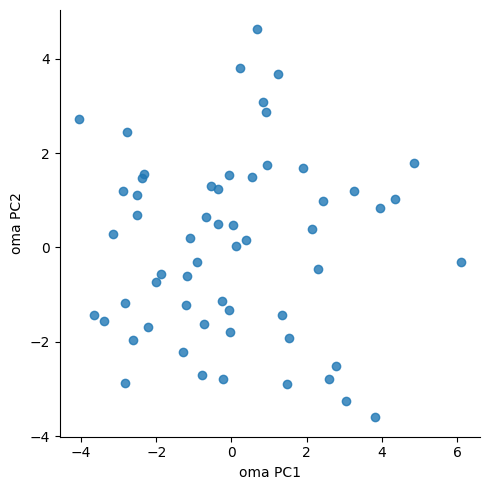

In [168]:
oma_num_pca_plot = sns.lmplot( x="oma PC1", y="oma PC2", data=omaFinal_numerics,fit_reg=False)
fig = oma_num_pca_plot.fig
#fig.savefig("oma_num_pca_plot.jpg", dpi = 300)

In [169]:
duplicates = principalDfoma_numerics.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicate entries: {num_duplicates}')

Number of duplicate entries: 0


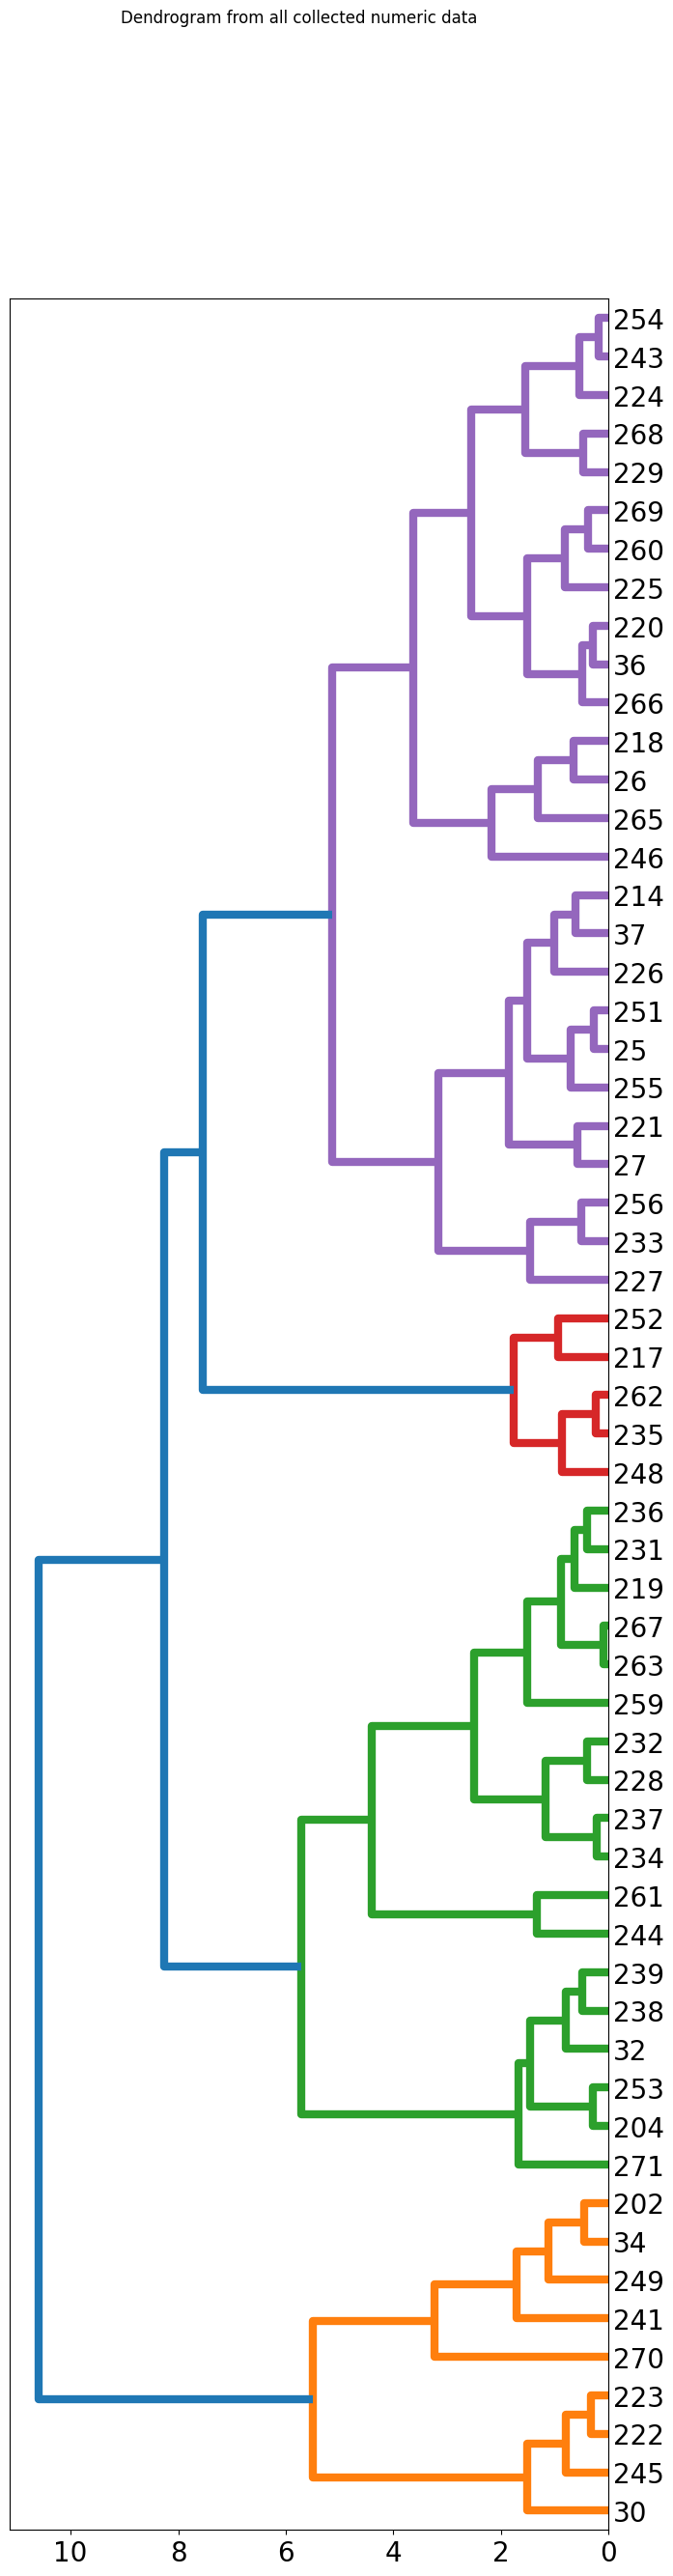

In [170]:
label_list = measured_data["SAMPLE"].tolist()

def get_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)


    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

x = principalDfoma_numerics
model = AgglomerativeClustering(distance_threshold=10, n_clusters=None, linkage="complete", compute_full_tree = True)

model = model.fit(x)


plot_dendrogram(model, labels = label_list, orientation = 'left', leaf_font_size = 10)
plt.rcParams["figure.figsize"] = (8,30)
plt.tick_params(labelsize = 20)
plt.tick_params(axis="y", direction = "in")
plt.suptitle("Dendrogram from all collected numeric data")
#plt.savefig("numerics_omadendro_23.jpg", dpi = 300)
plt.show()

# Geneettinen data lisäys tähän


In [171]:
with open("havaitut_geeni_korj_217_271_ei33a.csv") as genfile:
    gendf = pd.read_csv(genfile)

gendata = gendf.copy()
gendata["Label"] = gendata["Paikkanumero"].astype(str) + " " + gendata["Alkup tunnus"]
gendataz = gendf.copy()
genfeatures = list(gendata.columns)
genfeatures.remove("Paikkanumero")
genfeatures.remove("Alkup tunnus")
genfeatures.remove("Label")
print(list(gendataz["Paikkanumero"]))
print(len(list(gendataz["Paikkanumero"])))

[25, 26, 27, 30, 32, 34, 36, 37, 202, 204, 214, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 243, 244, 245, 246, 248, 249, 251, 252, 253, 254, 255, 256, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271]
58


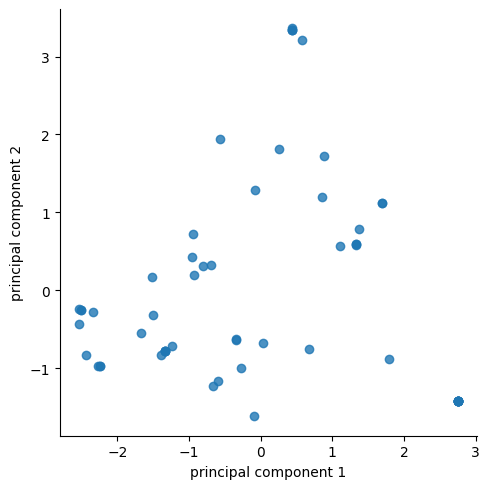

In [172]:
genx = gendataz[genfeatures]
pca = PCA(n_components=2)
genprincipalComponents = pca.fit_transform(genx)
genprincipalDf = pd.DataFrame(data = genprincipalComponents, columns = ['principal component 1', 'principal component 2'])
# Dataframe for the pca components
genfinalDf = pd.concat([gendf['Paikkanumero'], genprincipalDf], axis = 1)
#Pääkomponenttien merkitykset
#pca.explained_variance_ratio_.tofile("explained_variance_ratios.txt", sep=',', format="%s")

genpca_plot = sns.lmplot( x="principal component 1", y="principal component 2", data=genfinalDf,fit_reg=False)
fig = genpca_plot.fig
#fig.savefig("pca_plot_korjattu.jpg", dpi = 300)

In [173]:
measured_data

,SAMPLE,TIME,LEAF MARGIN,ABAXIAL INDUMENTUM,PEONY HEIGHT,LEAF HEIGHT,UPRIGHTNESS,PEDUNCLE LENGTH,FLOWER DIAMETER,FLOWER HEIGHT,...,SHAPE,FRAGRANCE,CHL,CHL_SD,FLAV,FLAV_SD,ANTH,ANTH_SD,NBI,NBI_SD
0,25,2,RED,NO,790,560,1,10.3,144,52,...,DOUBLEZONES,NORMAL,35.891,2.710,1.683,0.235,0.1270,0.032,21.798,4.162
1,26,1,RED,NO,870,640,2,12.0,139,63,...,DOUBLE,PLASTICKY,41.779,5.107,1.679,0.135,0.1040,0.027,24.885,2.463
2,27,1,RED,NO,790,590,1,8.0,127,50,...,CROWN,SWEET,32.530,5.232,1.606,0.142,0.1460,0.023,20.323,3.181
3,30,1,RED,NO,860,630,2,10.7,126,39,...,DOUBLE,PLASTICKY,27.665,3.136,1.542,0.250,0.1760,0.021,18.228,2.640
4,32,1,BROWN,NO,920,610,1,9.3,158,72,...,CROWN,NORMAL,35.704,2.506,1.574,0.149,0.1450,0.045,23.216,2.116
5,34,1,RED,NO,860,670,2,12.0,129,37,...,DOUBLE,PLASTICKY,39.219,5.143,1.445,0.193,0.0950,0.018,27.993,3.339
6,36,1,RED,NO,840,620,1,10.0,149,66,...,CROWN,WEAK,39.576,7.573,1.748,0.053,0.1200,0.031,23.207,4.575
7,37,2,RED,NO,770,490,0,6.7,149,49,...,DOUBLE,WEAK,37.320,3.877,1.737,0.133,0.1035,0.035,21.515,1.985
8,202,1,RED,NO,920,790,2,13.3,130,39,...,DOUBLE,PLASTICKY,41.348,9.780,1.528,0.161,0.0970,0.021,26.768,4.066
9,204,1,RED,NO,970,620,0,10.7,169,57,...,DOUBLEZONES,STRONG,33.639,2.090,1.607,0.141,0.1280,0.026,21.056,2.059


In [174]:
# First define the leaf label function.

def llf(val):
    #
    # print(val)
#    if id < n:
    haettu_labeli = ""
    haettu_labeli += str(measured_data.iloc[val]["SAMPLE"])

    #if measured_data.iloc[val+1]["Alapinnassa karvoja"] == 1:
    #    haettu_labeli += " Karvoja"

    return haettu_labeli
#    else:
 #       return '[joo]'
# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
#dendrogram(Z, leaf_label_func=
# , leaf_rotation=90)

# leaf_label_func can also be used together with ``truncate_mode`` parameter,
# in which case you will get your leaves labeled after truncation:
#dendrogram(Z, leaf_label_func=llf, leaf_rotation=90,
 #          truncate_mode='level', p=2)

In [175]:
#Addition of official sample codes used by LUKE
measured_data["naytenumero"] = lukecodes

C:\Users\antti\AppData\Local\Temp\ipykernel_18732\875310202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measured_data["naytenumero"] = lukecodes


c:\Users\antti\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\patches.py:2867: RuntimeWarning: divide by zero encountered in scalar divide
  f1 = self.rad / d1
c:\Users\antti\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\patches.py:2871: RuntimeWarning: invalid value encountered in scalar multiply
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


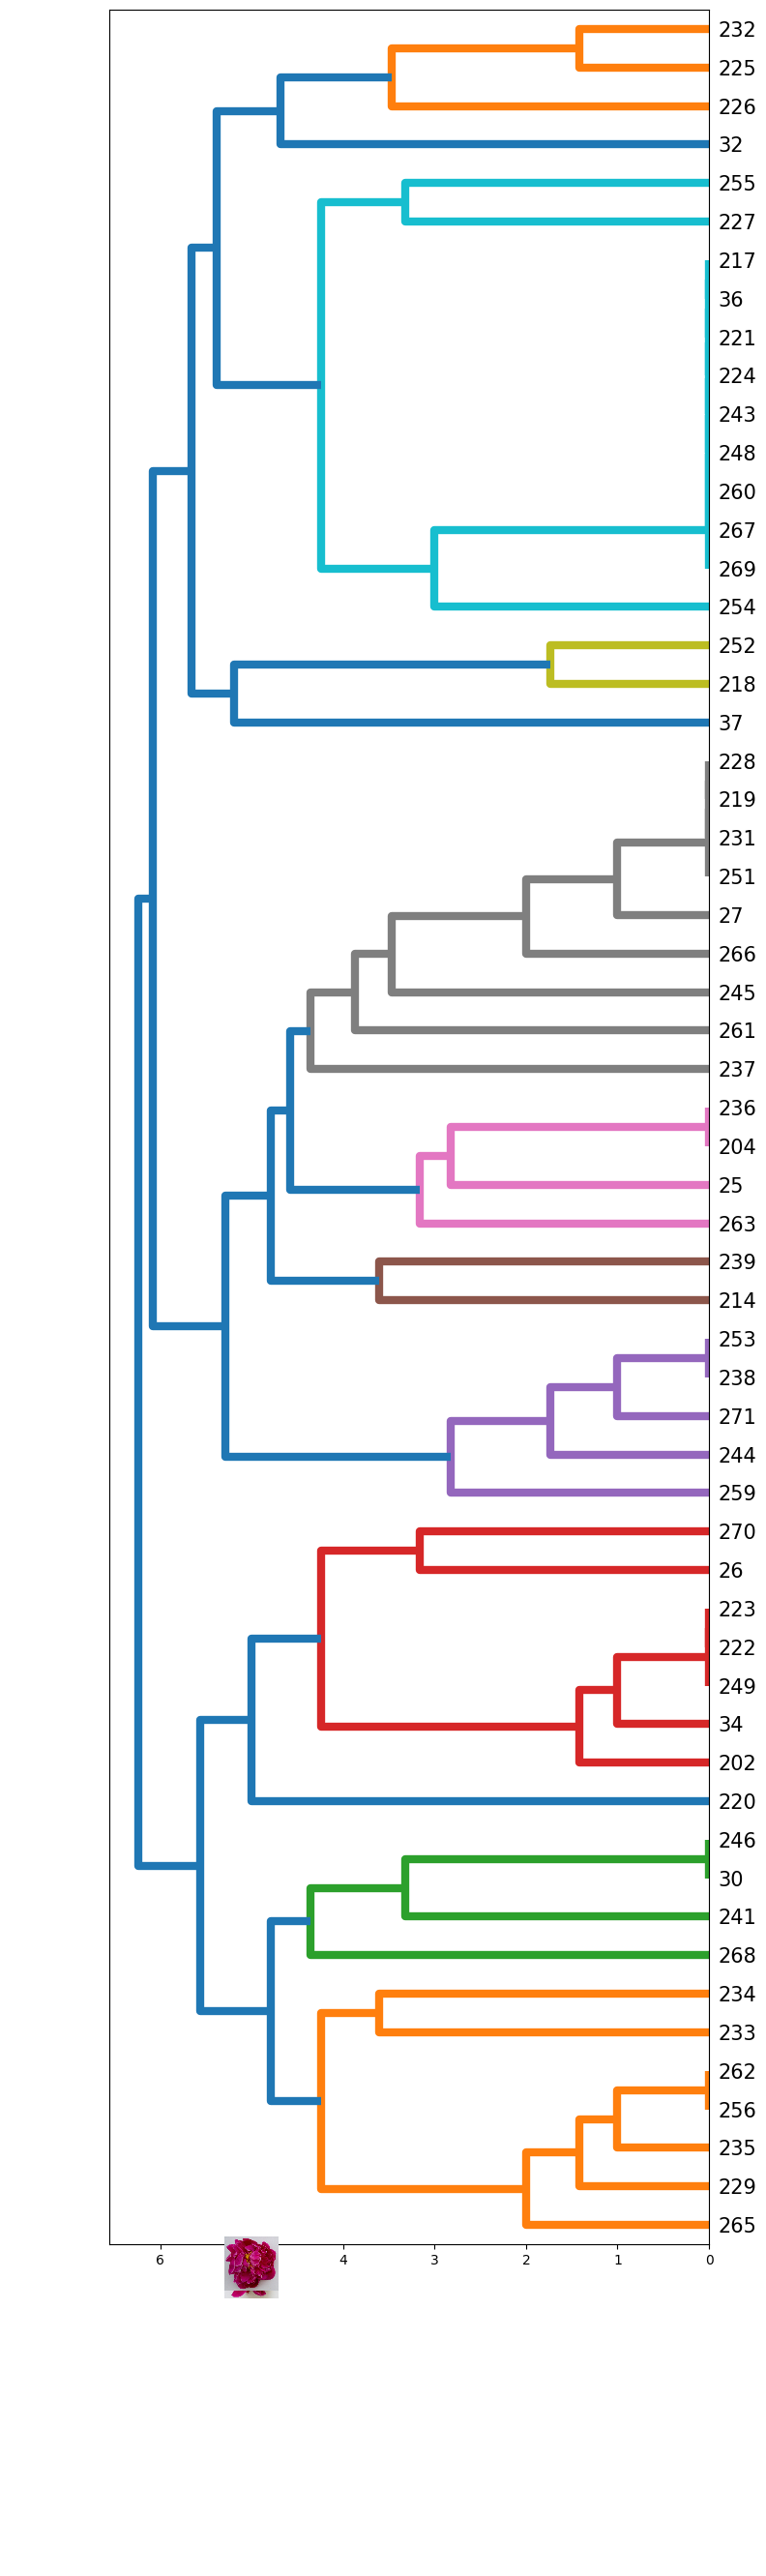

In [176]:
label_list = gendata["Paikkanumero"].tolist()

gendata = gendata.set_index("Paikkanumero")
gendata[genfeatures]

x = gendata[genfeatures]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")

model = model.fit(x)
#plot_dendrogram(model, labels = label_list, orientation = 'left', leaf_font_size = 10, leaf_label_func=llf)

d = get_dendrogram(model, labels = label_list, orientation = 'left', leaf_font_size =15, leaf_label_func=llf)

# get leaf coordinates
leaves = d['leaves']
#print(len(leaves))
icoord = d['icoord']
#print(len(icoord))
dcoord = d['dcoord']
#print(len(dcoord))
leaf_coords = []
for i in range(len(icoord)):
    for j in range(len(icoord[i])):
        if icoord[i][j] in leaves:
            x = icoord[i][j]
            y = dcoord[i][j]
            if (x, y) not in leaf_coords:
                leaf_coords.append((x, y))


""" toimii yhdelle kuvalle

# add image annotations to leaves
arr_img = plt.imread("neliot/25.jpg")
imagebox = OffsetImage(arr_img, zoom=0.1)
for xy in leaf_coords:
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(0.,30.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.3,
                        frameon=False,
                        arrowprops=dict(
                            arrowstyle="-",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )
    plt.gca().add_artist(ab)
"""

# get list of image files in folder
folder_path = 'neliot'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]

# add image annotations to leaves
for i, xy in enumerate(leaf_coords):
    arr_img = plt.imread(image_files[i % len(image_files)])
    imagebox = OffsetImage(arr_img, zoom=0.1)
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(0., -20.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.3,
                        frameon=False,
                        arrowprops=dict(
                            arrowstyle="-",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )
    plt.gca().add_artist(ab)

#säätöjä
#plt.rcParams["figure.figsize"] = (30,30)
#plt.tick_params(labelsize = 20)
#plt.tick_params(axis="y", direction = "in")
#plt.savefig("omadendro_23_karvat.jpg", dpi = 300)

In [177]:
measured_data.columns

Index(['SAMPLE', 'TIME', 'LEAF MARGIN', 'ABAXIAL INDUMENTUM', 'PEONY HEIGHT',
       'LEAF HEIGHT', 'UPRIGHTNESS', 'PEDUNCLE LENGTH', 'FLOWER DIAMETER',
       'FLOWER HEIGHT', 'FLOWER VOLUME IN CL', 'R', 'G', 'B', 'RGB_AVG',
       'STAMEN', 'OVARY', 'STIGMA', 'SHAPE', 'FRAGRANCE', 'CHL', 'CHL_SD',
       'FLAV', 'FLAV_SD', 'ANTH', 'ANTH_SD', 'NBI', 'NBI_SD', 'naytenumero'],
      dtype='object')

In [178]:
# Lisätään datataulukosta valittuja ominaisuuksia näytteiden kohdalle kuvaan 

def lisaa_dataa_kuvaan():
   

    #FIRST FIVE CATEGORICALS, UNCOMMENT TO PLOT
    """
    # FRAGRANCE
    ax2.text(6.5, 580.0, f'FRAGRANCE', color='red',weight='bold')
    ax2.text(6.5, -1.0, f'FRAGRANCE', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'FRAGRANCE'].values
        if len(values) > 0:
            ax2.text(6.5, y + 0.5, f'{values[0]}', color='black',weight='bold')

    
    # FLOWE SHAPE
    ax2.text(5, 580.0, f'SHAPE', color='red',weight='bold')
    ax2.text(5, -1.0, f'SHAPE', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'SHAPE'].values
        if len(values) > 0:
            ax2.text(5, y + 0.5, f'{values[0]}', color='black',weight='bold')

    
    # STIGMA
    ax2.text(3.5, 580.0, f'STIGMA', color='red',weight='bold')
    ax2.text(3.5, -1.0, f'STIGMA', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'STIGMA'].values
        if len(values) > 0:
            ax2.text(3.5, y + 0.5, f'{values[0]}', color='black',weight='bold')


    # OVARY
    ax2.text(2, 580.0, f'OVARY', color='red',weight='bold')
    ax2.text(2, -1.0, f'OVARY', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'OVARY'].values
        if len(values) > 0:
            ax2.text(2, y + 0.5, f'{values[0]}', color='black',weight='bold')


    # STAMEN
    ax2.text(0.5, 580.0, f'STAMEN', color='red',weight='bold')
    ax2.text(0.5, -1.0, f'STAMEN', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'STAMEN'].values
        if len(values) > 0:
            ax2.text(0.5, y + 0.5, f'{values[0]}', color='black',weight='bold')
    

    """

    #LATTER FOUR CATEGORICALS, UNCOMMENT TO PLOT
    """
    # UPRIGHTNESS
    ax2.text(6, 580.0, f'UPRIGHTNESS', color='red',weight='bold')
    ax2.text(6, -1.0, f'UPRIGHTNESS', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'UPRIGHTNESS'].values
        if len(values) > 0:
            ax2.text(6, y + 0.5, f'{values[0]}', color='black',weight='bold')

    
    # ADAXIAL INDUMENTUM
    ax2.text(4, 580.0, f'ADAXIAL INDUMENTUM', color='red',weight='bold')
    ax2.text(4, -1.0, f'ADAXIAL INDUMENTUM', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'ADAXIAL INDUMENTUM'].values
        if len(values) > 0:
            ax2.text(4, y + 0.5, f'{values[0]}', color='black',weight='bold')

    
    # LEAF MARGIN
    ax2.text(2, 580.0, f'LEAF MARGIN', color='red',weight='bold')
    ax2.text(2, -1.0, f'LEAF MARGIN', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'LEAF MARGIN'].values
        if len(values) > 0:
            ax2.text(2, y + 0.5, f'{values[0]}', color='black',weight='bold')


    # TIME
    ax2.text(0.5, 580.0, f'TIME', color='red',weight='bold')
    ax2.text(0.5, -1.0, f'TIME', color='red',weight='bold')

    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'TIME'].values
        if len(values) > 0:
            ax2.text(0.5, y + 0.5, f'{values[0]}', color='black',weight='bold')
    """



    """
    # korkeus kukkiva
    ax2.text(5.5, 582.0, f'LEAF HEIGHT', color='green',weight='bold')

    scale_factor = 180 # adjustable value for scaling the bars
    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'PEONY HEIGHT'].values
        if len(values) > 0:
            ax2.bar(6.6, 3, bottom=y + 0.6, width= -values[0]/scale_factor, color='pink', align='edge', edgecolor ='black')
    avg = measured_data.loc[measured_data['SAMPLE'] == int(label), 'PEONY HEIGHT'].values
    plt.axvline(x=avg, linewidth=2, linestyle='-')

    # korkeus lehdistö
    ax2.text(2.5, 582.0, f'PEONY HEIGHT', color='pink',weight='bold')

    scale_factor = 180 # adjustable value for scaling the bars
    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'LEAF HEIGHT'].values
        if len(values) > 0:
            ax2.bar(6.6, 3, bottom=y - 3.4, width= -values[0]/scale_factor, color='green', align='edge', edgecolor ='black')

    """


    # PEDUNCLE LENGTH
    ax2.text(5.5, 582.0, f'PEDUNCLE LENGTH', color='blue',weight='bold')
    scale_factor = 2.5 # adjust this value to achieve the desired scaling
    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'PEDUNCLE LENGTH'].values
        if len(values) > 0:
            ax2.bar(6.6, 3, bottom=y + 0.6, width=-values[0]/scale_factor, color='blue', align='edge', edgecolor ='black')

    # FLOWER VOLUME IN CL
    ax2.text(2.5, 582.0, f'FLOWER VOLUME', color='red',weight='bold')
    scale_factor = 30 # adjust this value to achieve the desired scaling
    for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
        values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'FLOWER VOLUME IN CL'].values
        if len(values) > 0:
            ax2.bar(6.6, 3, bottom=y - 3.4, width=-values[0]/scale_factor, color='red', align='edge', edgecolor ='black')

    #Poikittaiset viivat 
    for y in leaf_ycoords:
        ax2.axhline(y+5.4, color='black', linestyle='solid', alpha=0.5, linewidth=1.5)
    #Poikittaiset viivat 
    for x in range(0,6):
        ax2.axvline(x+0, color='gray', linestyle='dashed', alpha=0.5, linewidth=1.5)

    
    



## Drawing the main dendrogram depicting the sample set

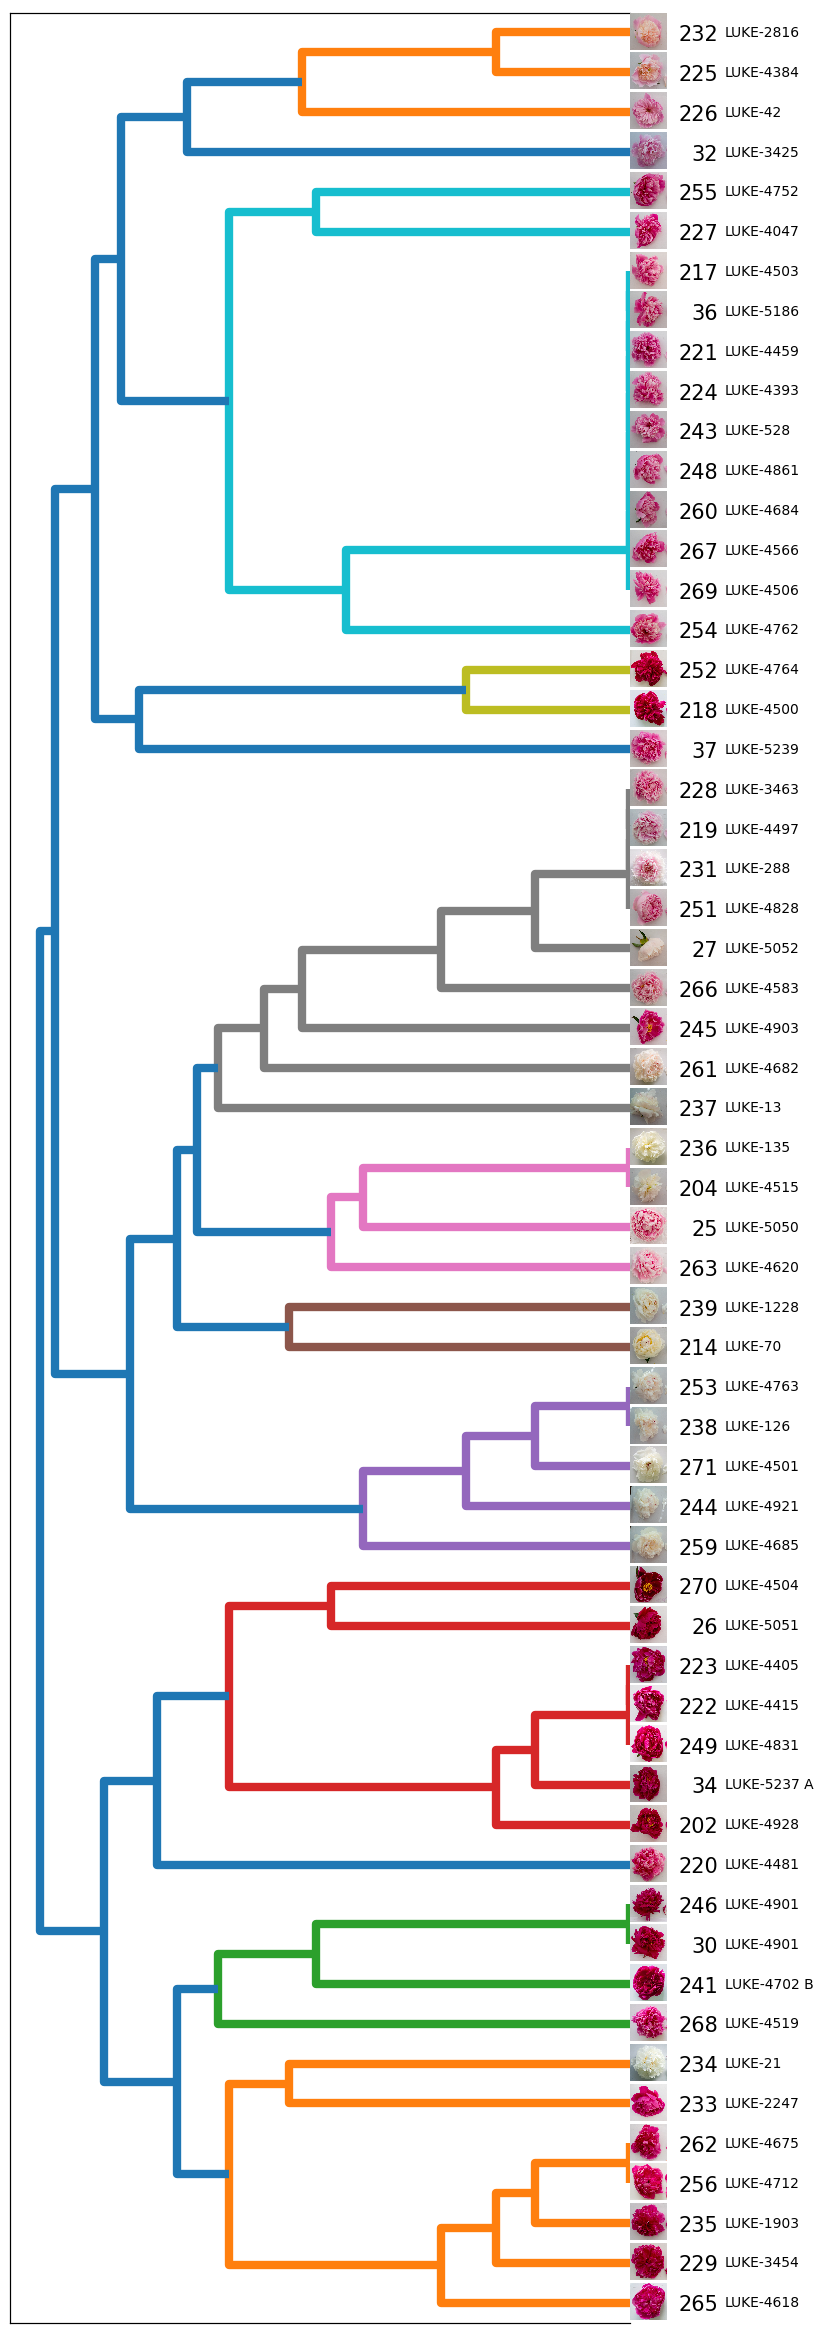

In [179]:
plt.clf()
#plt.figure(figsize=(20,20))
#fig, ax = plt.subplots(figsize=(20,20)

d = get_dendrogram(model, labels = label_list, orientation = 'left', leaf_font_size =15, leaf_label_func=llf)



# get leaf y-coordinates and labels
ax = plt.gca()


yticks = ax.get_yticks()
leaf_ycoords = [y for y in yticks if y.is_integer()]
leaf_labels = [label.get_text() for label in ax.get_yticklabels()]

# get list of image files in folder
folder_path = 'neliot'
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]

# create a dictionary to map leaf labels to image files
label_to_image = {}
for image_file in image_files:
    filename = os.path.basename(image_file)
    label = filename.split('.')[0]
    label_to_image[label] = image_file

# create a second axes object for plotting images
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(leaf_ycoords)
ax2.set_yticklabels(['' for _ in leaf_ycoords])

# add image annotations to leaves
for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
    xy = (0, y + 3)
    if label in label_to_image:
        arr_img = plt.imread(label_to_image[label])
        imagebox = OffsetImage(arr_img, zoom=0.065)
        ab = AnnotationBbox(imagebox, xy,
                            xybox=(13., -8.),
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0.3,
                            frameon=False,
                            )
        ax2.add_artist(ab)

# move y-axis labels inside the plot close to the right side
ax.yaxis.set_tick_params(pad=-510)
ax.patch.set_alpha(0.01)


# offset y labels a bit up
offset = transforms.ScaledTranslation(1, 15/72, ax.figure.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

#width = 1
#height = width


# Lisää ylläolevan funktion mukaisesti ominaisuuksia kuvaan
#lisaa_dataa_kuvaan()

#Modifications
plt.rcParams['lines.linewidth'] = 6
# LUKE-numbers

for i, (y, label) in enumerate(zip(leaf_ycoords, leaf_labels)):
    values = measured_data.loc[measured_data['SAMPLE'] == int(label), 'naytenumero'].values
    if len(values) > 0:
        ax2.text(-1.0, y -1, f'{values[0]}', color='black')


fig=plt.gcf()
ax.spines[['right']].set_visible(False)
ax2.spines[['right']].set_visible(False)


ax.tick_params(axis='y', which='both', length=0)



plt.xticks([])
plt.yticks([])


fig.set_size_inches(8,30)



#UNCOMMENT TO OVERLAY DATA VALUES OR BARS ON TOP OF THE DENDROGRAM BASED ON THE FUNCTIONS SELECTED IN THE PREVIOUS CODE CELL
#lisaa_dataa_kuvaan()
plt.grid()
#fig.savefig('dendrokuvat_eitekstia.jpg', dpi=100)
plt.show()


In [180]:
#measured_data.count
measured_data

,SAMPLE,TIME,LEAF MARGIN,ABAXIAL INDUMENTUM,PEONY HEIGHT,LEAF HEIGHT,UPRIGHTNESS,PEDUNCLE LENGTH,FLOWER DIAMETER,FLOWER HEIGHT,...,FRAGRANCE,CHL,CHL_SD,FLAV,FLAV_SD,ANTH,ANTH_SD,NBI,NBI_SD,naytenumero
0,25,2,RED,NO,790,560,1,10.3,144,52,...,NORMAL,35.891,2.710,1.683,0.235,0.1270,0.032,21.798,4.162,LUKE-5050
1,26,1,RED,NO,870,640,2,12.0,139,63,...,PLASTICKY,41.779,5.107,1.679,0.135,0.1040,0.027,24.885,2.463,LUKE-5051
2,27,1,RED,NO,790,590,1,8.0,127,50,...,SWEET,32.530,5.232,1.606,0.142,0.1460,0.023,20.323,3.181,LUKE-5052
3,30,1,RED,NO,860,630,2,10.7,126,39,...,PLASTICKY,27.665,3.136,1.542,0.250,0.1760,0.021,18.228,2.640,LUKE-4901
4,32,1,BROWN,NO,920,610,1,9.3,158,72,...,NORMAL,35.704,2.506,1.574,0.149,0.1450,0.045,23.216,2.116,LUKE-3425
5,34,1,RED,NO,860,670,2,12.0,129,37,...,PLASTICKY,39.219,5.143,1.445,0.193,0.0950,0.018,27.993,3.339,LUKE-5237 A
6,36,1,RED,NO,840,620,1,10.0,149,66,...,WEAK,39.576,7.573,1.748,0.053,0.1200,0.031,23.207,4.575,LUKE-5186
7,37,2,RED,NO,770,490,0,6.7,149,49,...,WEAK,37.320,3.877,1.737,0.133,0.1035,0.035,21.515,1.985,LUKE-5239
8,202,1,RED,NO,920,790,2,13.3,130,39,...,PLASTICKY,41.348,9.780,1.528,0.161,0.0970,0.021,26.768,4.066,LUKE-4928
9,204,1,RED,NO,970,620,0,10.7,169,57,...,STRONG,33.639,2.090,1.607,0.141,0.1280,0.026,21.056,2.059,LUKE-4515


### Groups of identical genotypes

In [181]:
measured_data.drop('naytenumero', axis=1)
measured_data.columns

Index(['SAMPLE', 'TIME', 'LEAF MARGIN', 'ABAXIAL INDUMENTUM', 'PEONY HEIGHT',
       'LEAF HEIGHT', 'UPRIGHTNESS', 'PEDUNCLE LENGTH', 'FLOWER DIAMETER',
       'FLOWER HEIGHT', 'FLOWER VOLUME IN CL', 'R', 'G', 'B', 'RGB_AVG',
       'STAMEN', 'OVARY', 'STIGMA', 'SHAPE', 'FRAGRANCE', 'CHL', 'CHL_SD',
       'FLAV', 'FLAV_SD', 'ANTH', 'ANTH_SD', 'NBI', 'NBI_SD', 'naytenumero'],
      dtype='object')

In [182]:
measured_data_analyysi = measured_data.copy()
#measured_data_analyysi = measured_data_analyysi.drop(["sisaTLB","sisaTLR","sisaTLG","ulkoTLB","ulkoTLR","ulkoTLG","naytenumero","Dualex group","NBI_ala", "Flav_ala", "Anth_ala", "Chl_ala","NBI_keski", "Flav_keski", "Anth_keski", "Chl_keski","NBI_yla", "Flav_yla", "Anth_yla", "Chl_yla","NBI_sd", "Flav_sd", "Anth_sd", "Chl_sd"], axis=1)



duplicates_1 = [36,217,221,224,243,248,260,267,269]
duplicates_2 = [219,228,231,251]
duplicates_3 = [222,223,249]
duplicates_4 = [30, 246]
duplicates_all = duplicates_1 + duplicates_2 + duplicates_3
no_duplicates = measured_data_analyysi.copy()
no_duplicates = no_duplicates[~no_duplicates['SAMPLE'].isin(duplicates_all)]

group_anum = [232, 225, 226, 32]
group_bnum = [255, 227, 217, 254]
group_cnum = [252, 218]
group_dnum = [236, 204, 25, 263]
group_enum = [253, 238, 271, 244, 259]
group_fnum = [26, 223, 34, 202]
group_gnum = [246, 241, 268]
group_hnum = [233, 262, 256, 235, 229, 265]



# Changing categorical variables with values as numbers to be treated as categorical variables
change_to_cat = ['ABAXIAL INDUMENTUM','TIME','UPRIGHTNESS']

for i in change_to_cat:
    measured_data_analyysi[i] = measured_data_analyysi[i].astype(object)

In [183]:
no_duplicates = measured_data_analyysi.copy()
no_duplicates = no_duplicates[~no_duplicates['SAMPLE'].isin(duplicates_all)]

In [184]:
# Chosen group is a list of sample numbers to calculate pairwise correlations for.
# Name is the name used in the plot to describe the chosen sample group.

def group_correlationheatmap(dataset_standardised, chosen_group, name):

    kaikki_z = dataset_standardised.set_index(measured_data["SAMPLE"])

    korrelaatiot = kaikki_z.copy()
    korrelaatiot = korrelaatiot.select_dtypes(include=['object']).astype("category").join(korrelaatiot.select_dtypes(exclude=['object']))
    dummyt = pd.get_dummies(korrelaatiot.select_dtypes(include=['category']), dtype=int)
    dummattu_data = korrelaatiot.select_dtypes(exclude=['category']).join(dummyt)
    dummattu_z = stats.zscore(dummattu_data, axis=0, ddof=0,nan_policy="omit")
    dummattu_z_corrw = dummattu_data.apply(lambda x: dummattu_z.corrwith(x))



    dummattu_z = dummattu_z.set_index(measured_data["SAMPLE"])
    #FOR DUPLICATE GROUP 1
    valitut = kaikki_z.loc[chosen_group]
    valitut_z = dummattu_z.loc[chosen_group]

    group_name = name


    plt.figure(figsize=(20,20))
    fig, ax = plt.subplots(figsize=(20,16))
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')

    correlationmatrix = valitut_z.corr(method='pearson')


    dummattu_z_corrw = dummattu_data.apply(lambda x: dummattu_z.corrwith(x))

    dummattu_z_corrw_transp = dummattu_z_corrw.transpose()


    sns.heatmap(
        correlationmatrix,
        #xticklabels=lukumaaralista,
        #yticklabels=lukumaaralista,
        square=True,
        cmap='bwr',
        cbar= True,
        linewidth=1,
    
    )
    

    #plt.savefig("correlations_dummattudata_kaikki.png", dpi=300)

    # Get the column names from kaikki_z_cat
    #kaikki_z_cat_columns = kaikki_z_cat.columns

    #ax.set_yticklabels(lukumaaralista)

    # Get the existing y-axis tick labels
    #existing_labels = [label.get_text() for label in ax.get_yticklabels()]

    # Add lines between every 5 rows and columns
    for i in range(5, correlationmatrix.shape[0], 5):
        plt.axhline(y=i, color='black', linewidth=0.5)
        plt.axvline(x=i, color='black', linewidth=0.5)

    plt.title(f"Pairwise correlations between measured variables in {group_name}", fontsize = 20)

    plt.show()


<Figure size 2000x2000 with 0 Axes>

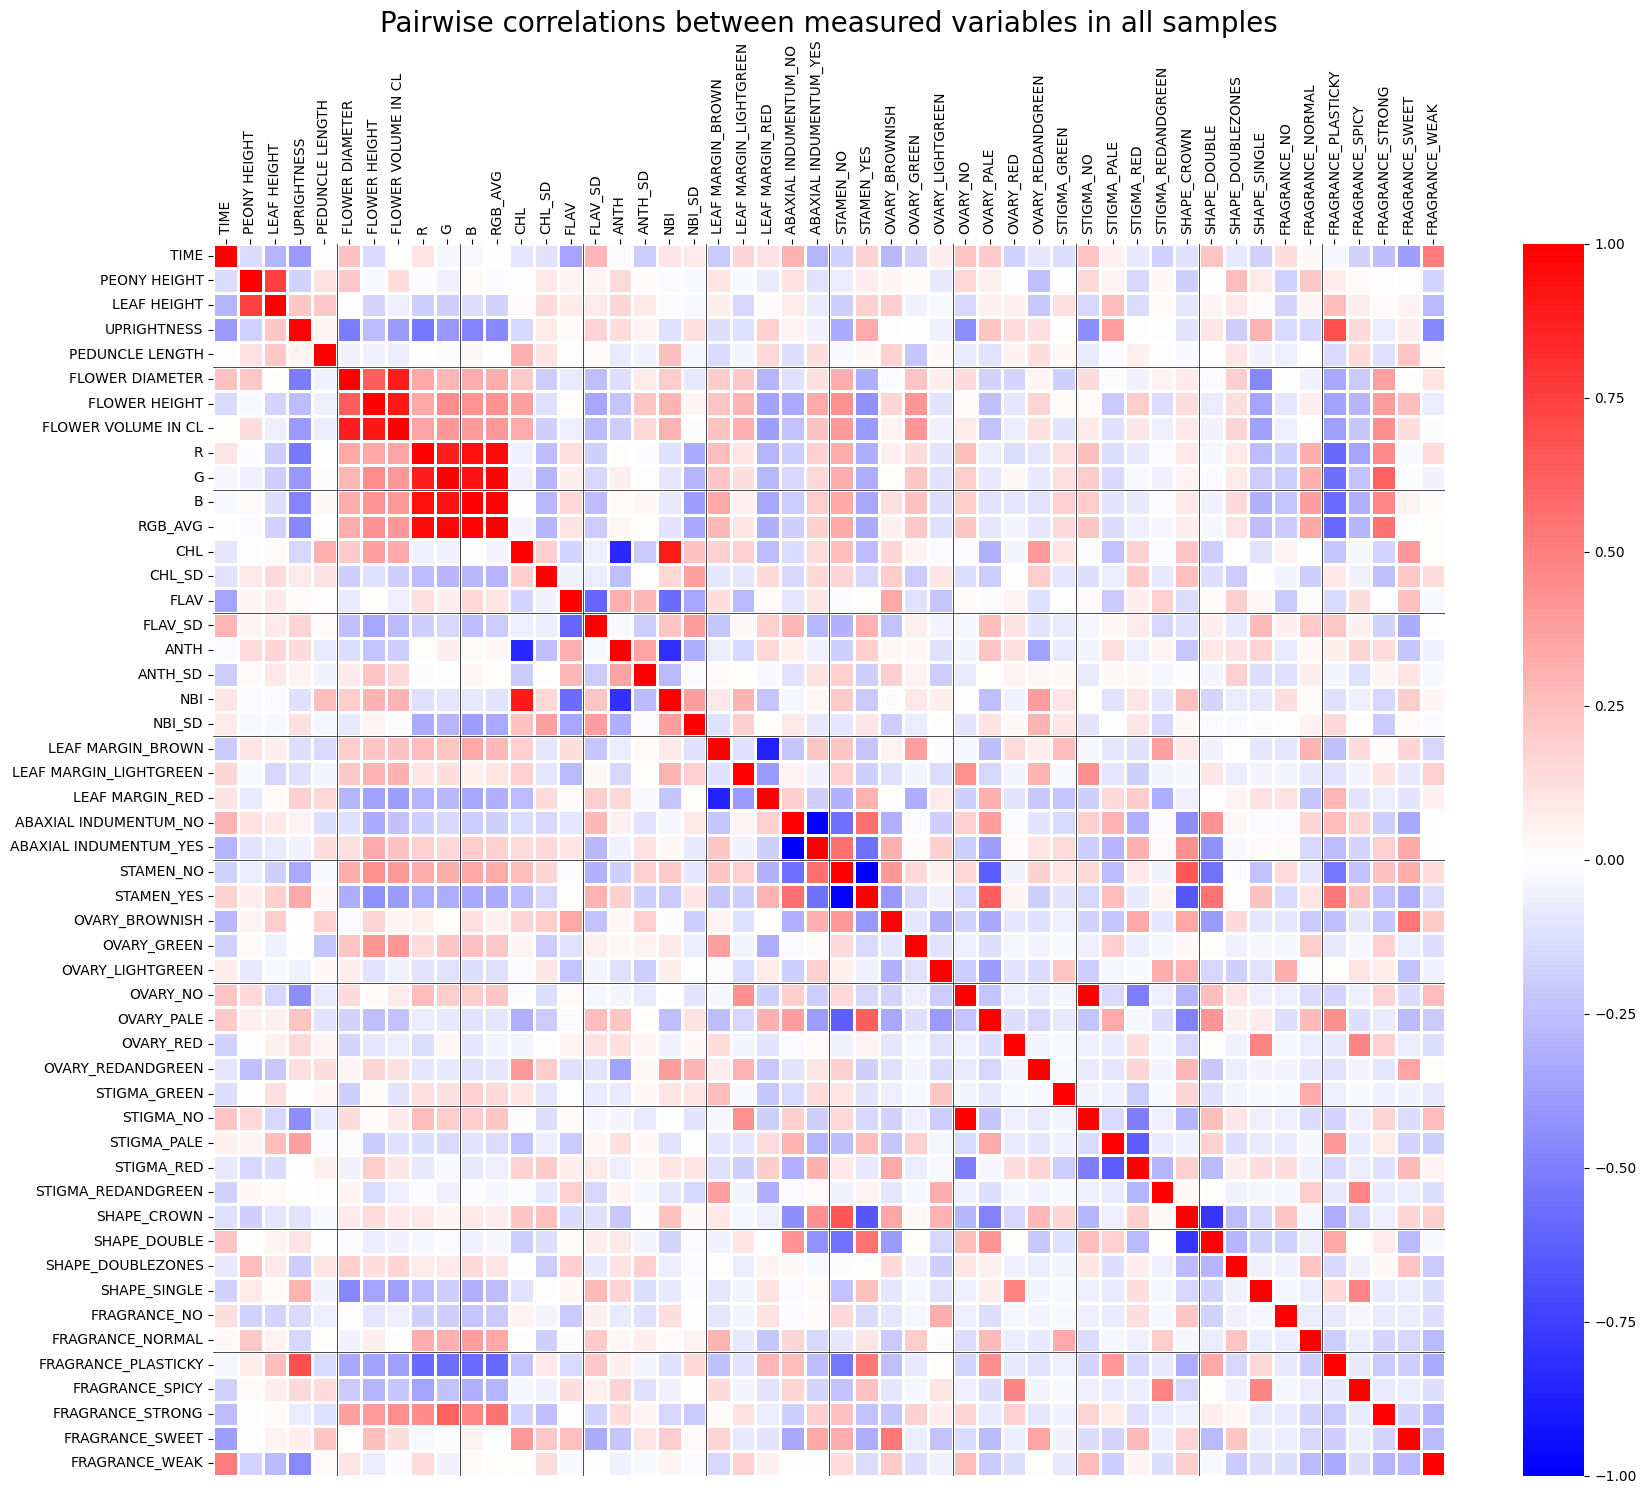

In [185]:
group_correlationheatmap( kaikki_z, measured_data["SAMPLE"], "all samples")

In [186]:
measured_data_analyysi.columns

Index(['SAMPLE', 'TIME', 'LEAF MARGIN', 'ABAXIAL INDUMENTUM', 'PEONY HEIGHT',
       'LEAF HEIGHT', 'UPRIGHTNESS', 'PEDUNCLE LENGTH', 'FLOWER DIAMETER',
       'FLOWER HEIGHT', 'FLOWER VOLUME IN CL', 'R', 'G', 'B', 'RGB_AVG',
       'STAMEN', 'OVARY', 'STIGMA', 'SHAPE', 'FRAGRANCE', 'CHL', 'CHL_SD',
       'FLAV', 'FLAV_SD', 'ANTH', 'ANTH_SD', 'NBI', 'NBI_SD', 'naytenumero'],
      dtype='object')

In [187]:
group_1 = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(duplicates_1)]
group_2 = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(duplicates_2)]
group_3 = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(duplicates_3)]
group_4 = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(duplicates_4)]
group_a = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_anum)]
group_b = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_bnum)]
group_c = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_cnum)]
group_d = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_dnum)]
group_e = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_enum)]
group_f = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_fnum)]
group_g = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_gnum)]
group_h = measured_data_analyysi[measured_data_analyysi['SAMPLE'].isin(group_hnum)]
allsamples = measured_data_analyysi.copy()

In [188]:
# Duplikaattiryhmien analyysit
"""def group_x_analysis(group_x):

    numerical_columns = group_x.select_dtypes(include=['float64', 'int64']).columns 
    categorical_columns = group_x.select_dtypes(include=['object']).columns

    # Calculate mean z-scores for numerical columns
    numerical_zscores = group_x[numerical_columns].apply(lambda x: zscore(x, nan_policy='omit')).mean()

    # Calculate percentage of duplicates for categorical columns
    categorical_duplicates = group_x[categorical_columns].apply(lambda x: (x.duplicated().sum() / (len(x)-1)) * 100)

    # Combine into a single DataFrame
    group_x_analysis_result = pd.concat([numerical_zscores, categorical_duplicates], keys=['Mean Z-Scores', 'Duplicate Percentage'])

    print("group analysis results \n",group_x_analysis_result)
"""

'def group_x_analysis(group_x):\n\n    numerical_columns = group_x.select_dtypes(include=[\'float64\', \'int64\']).columns \n    categorical_columns = group_x.select_dtypes(include=[\'object\']).columns\n\n    # Calculate mean z-scores for numerical columns\n    numerical_zscores = group_x[numerical_columns].apply(lambda x: zscore(x, nan_policy=\'omit\')).mean()\n\n    # Calculate percentage of duplicates for categorical columns\n    categorical_duplicates = group_x[categorical_columns].apply(lambda x: (x.duplicated().sum() / (len(x)-1)) * 100)\n\n    # Combine into a single DataFrame\n    group_x_analysis_result = pd.concat([numerical_zscores, categorical_duplicates], keys=[\'Mean Z-Scores\', \'Duplicate Percentage\'])\n\n    print("group analysis results \n",group_x_analysis_result)\n'

In [189]:




def group_x_analysis_tofile(group_x, name):

    # Create a copy of the DataFrame to keep the original unchanged
    group_x_copy = group_x.copy()

    # Remove the column 'paikka'
    if 'SAMPLE' in group_x_copy.columns:
        group_x_copy = group_x_copy.drop(columns=['SAMPLE'])

    if 'naytenumero' in group_x_copy.columns:
        group_x_copy = group_x_copy.drop(columns=['naytenumero'])

    numerical_columns = group_x_copy.select_dtypes(include=['float64', 'int64']).columns 
    categorical_columns = group_x_copy.select_dtypes(include=['object']).columns

    # Calculate coefficients of variation for numerical variables: CoV = Standard Deviation / Mean (* 100%)
    # NOTE REMOVED * 100 % that the earlier plots had to achieve more similar scales 
    numerical_cv = group_x_copy[numerical_columns].apply(lambda x: (x.std() / x.mean()))

    # Calculate entropy for categorical columns using base 2  (bits)
    categorical_entropy = group_x_copy[categorical_columns].apply(lambda x: entropy (x.value_counts (normalize=True), base=2))

    # Create separate DataFrames
    df1 = pd.DataFrame({'Coefficients of Variation': numerical_cv})
    df2 = pd.DataFrame({'Entropy': categorical_entropy})

    # Combine into a single DataFrame
    group_x_analysis_result = pd.concat([df1, df2])

    filename = f"{name}_analysis_results.csv"

    # Write the analysis results to the file
    group_x_analysis_result.to_csv(filename, sep=';', decimal=',')

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    
    bar1 = plt.barh(numerical_cv.index, numerical_cv, color='blue', alpha=1, label='Numerical')
    bar2 = plt.barh(categorical_entropy.index, categorical_entropy, color='darkgreen', alpha=1, label='Categorical')
    
    plt.xlabel('Coefficients of variation for num. variables and entropy for cat. variables [bits]')
    
    # Variable values next to the bars
    for bar in bar1:
        plt.text(bar.get_width()/1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left', color='black')
        
    for bar in bar2:
        plt.text(bar.get_width()/1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left', color='black')

    plt.title(f'{name}: Variability of features')
    
    plt.legend()
    
    plt.show()

    # Save the plot as a PNG file
    #plt.savefig(f"{name}_barplot.png")


In [190]:
len(measured_data["SAMPLE"])

58

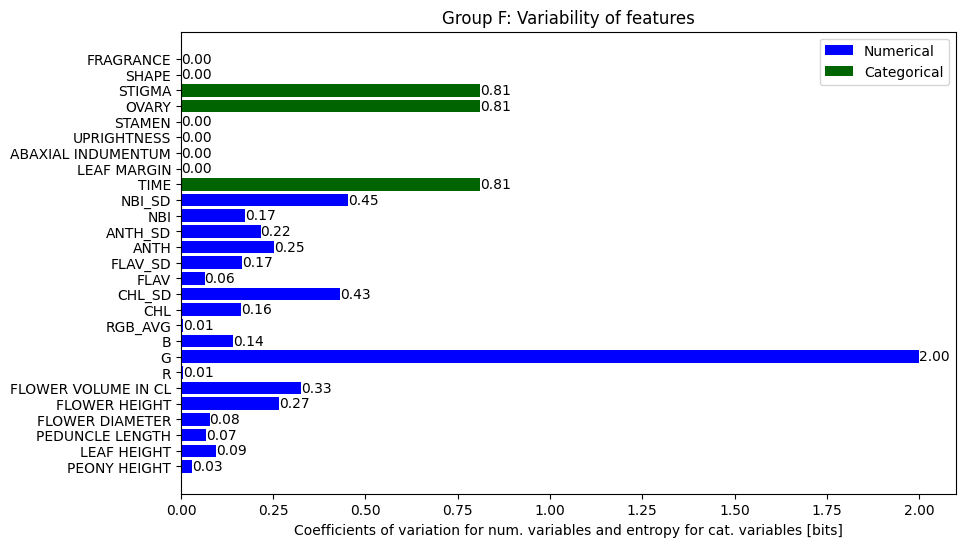

In [191]:
group_x_analysis_tofile(group_f,"Group F")




In [192]:
duplicates_4

[30, 246]